In [26]:
import csv
import io
import numpy as np
import sklearn as sk
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [27]:
col_data = [("Genre", "|S20"),
            ("Artist", "|S50"),
            ("Track", "|S50"),
            ("Track ID", "|S22"),
            ("Popularity", int),
            ("Acousticness", float),
            ("Danceability", float),
            ("Duration (MS)", int),
            ("Energy", float),
            ("Instrumentalness", float),
            ("Key", "|S2"),
            ("Liveness", float),
            ("Loudness", float),
            ("Mode", "|S5"),
            ("Speechiness", float),
            ("Tempo", float),
            ("Time Signature", "|S3"),
            ("Valence", float)]

with io.open("SpotifyFeatures.csv", "r", encoding="utf-8") as f:
    data = np.genfromtxt(f, delimiter=",", skip_header=1, comments=None, dtype=col_data)

x array - 230253 x 10  
acousticness 5  
danceability 6  
duration 7  
energy 8  
instrumentalness 9  
liveness 11  
loudness 12  
speechiness 14  
tempo 15  
valence 17  

should we also include key, time signature, mode? (will need to map to numbers)  

y array - 230253 x 1  
genres (the true labels) mapped to numbers

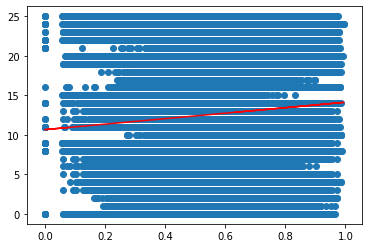

In [50]:
x = np.empty((230253, 10))
y = np.empty((230253, 1))
genre_mapping_dict = {}
genre_idx = 0

for i in range(len(data)):
    row = data[i]
    genre = row[0].decode("utf-8")
    if not genre in genre_mapping_dict:
        genre_mapping_dict[genre] = genre_idx
        genre_idx += 1
    y[i] = genre_mapping_dict[genre]
    
    values = [row[5], row[6], row[7], 
              row[8], row[9], row[11], 
              row[12], row[14], row[15], row[17]]
    x[i, :] = values
    

# i think this is danceablilty?
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x[:,1:2], y)  # perform linear regression
Y_pred = linear_regressor.predict(x[:,1:2])  # make predictions
plt.scatter(x[:,1:2], y)
plt.plot(x[:,1:2], Y_pred, color='red')
plt.show()

In [47]:
# from sklearn.linear_model import LinearRegression
# import pandas as pd  # To read data

# data = pd.read_csv('SpotifyFeatures.csv')  # load data set

# X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
# Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, Y)  # perform linear regression
# Y_pred = linear_regressor.predict(X)  # make predictions
# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')
# plt.show()